### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

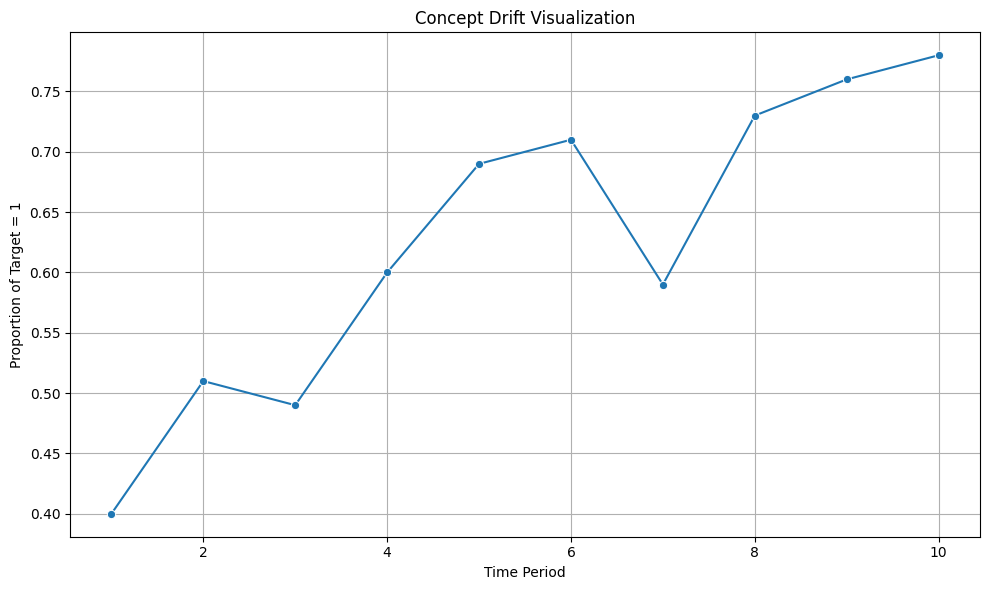

In [3]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Simulate the Dataset ---
def simulate_concept_drift(n_samples=1000, n_time_periods=10):
    """Simulate a binary classification dataset with concept drift."""
    # Time periods
    time_periods = np.linspace(1, n_time_periods, n_time_periods)
    
    # Simulate initial distribution of the binary target (0 or 1)
    # Initially, we assume a distribution of 60% class 0 and 40% class 1
    initial_class_prob = 0.6
    
    # Container for data
    data = []
    
    # Gradually change the distribution of the target variable over time
    for time in time_periods:
        # Simulate a drift where the probability of class 1 increases over time
        drift_factor = 0.4 * (time / n_time_periods)  # Gradual shift from 0.6 to 0.5
        class_0_prob = initial_class_prob - drift_factor
        class_1_prob = 1 - class_0_prob
        
        # Simulate the target variable for each time period
        target = np.random.choice([0, 1], size=n_samples//n_time_periods, p=[class_0_prob, class_1_prob])
        
        # Add to dataset
        for t in target:
            data.append((time, t))
    
    # Create a DataFrame
    df = pd.DataFrame(data, columns=["Time", "Target"])
    return df

# --- Step 2: Visualize Concept Drift ---
def plot_concept_drift(df):
    """Plot the concept drift over time."""
    # Group by time and calculate the proportion of 1s in the target
    drift_plot = df.groupby("Time")["Target"].mean()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=drift_plot.index, y=drift_plot.values, marker='o')
    plt.title("Concept Drift Visualization")
    plt.xlabel("Time Period")
    plt.ylabel("Proportion of Target = 1")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Step 3: Execute and Visualize ---
# Simulate data with 1000 samples and 10 time periods
df_concept_drift = simulate_concept_drift(n_samples=1000, n_time_periods=10)

# Plot the concept drift
plot_concept_drift(df_concept_drift)
